In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import optuna
from sklearn.metrics import accuracy_score

# Modelos (elige al menos 5)
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

RANDOM_STATE = 42
N_JOBS = -1

cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

/home/mayumar/Escritorio/metodos_superivsados/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Cargar datasets

In [2]:
df_train = pd.read_csv(f'data/training.csv', index_col='Unnamed: 0')
df_train

,bqwyz,glhls,gwrec,bpsmt,csuhz,dsdfq,dhmrb,qimhg,dnywb,bbznq,...,dbcsa,vieby,mpqtr,vxswx,xpwzl,vbsda,fiptu,jahkp,ownqd,class
1,-12.993810,-3.689143,6.000694,17.215317,15.319216,0.003135,17.779791,16.248288,0.253989,-17.427260,...,0.616191,-1.037537,0.640160,-1.586657,1.786693,0.854592,-1.318690,-0.317202,1.387131,1
2,6.246265,1.764485,-3.318136,15.920140,15.471565,0.012288,-8.952036,16.345302,1.098853,-4.312381,...,-1.436535,0.439239,0.298879,-0.401065,1.441416,-0.617473,-0.137313,1.982024,1.249828,0
3,-3.039952,-0.262428,1.168803,-13.059538,-13.989008,0.022966,2.920655,-12.881768,0.795419,3.261357,...,-1.371939,1.531874,-0.156040,-0.795904,0.114599,-0.416141,0.050341,0.200234,1.222475,0
4,-10.644402,-3.330536,5.633811,-11.523825,-11.433825,0.030853,14.704378,-11.115733,1.379458,-16.017284,...,0.060147,0.547056,-1.044690,0.636920,0.376566,-1.013476,-0.710287,1.150738,0.391557,0
5,-4.488924,-1.091610,2.512258,1.073196,2.646280,0.027421,5.430353,2.135076,1.212872,-28.630766,...,-1.371114,2.015222,1.064987,3.702119,1.460052,1.066106,-0.798662,1.337375,1.524883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2.161828,0.889372,-0.909907,-9.424528,-9.463202,0.032272,-2.245275,-9.774745,1.498397,13.483175,...,-0.775941,0.313495,-1.846885,0.259550,1.669447,-0.652184,0.449444,-0.837582,-0.232072,1
2997,9.423973,2.739729,-4.717318,36.887928,38.017644,0.000482,-12.149357,37.781838,1.510205,11.835781,...,-0.519178,0.775758,-3.448228,-0.499556,-0.468117,0.227029,1.540119,1.475654,1.801369,1
2998,-10.339338,-3.347024,5.134052,10.100862,10.082019,0.011846,14.774080,10.896598,1.326837,7.238309,...,0.862477,2.485642,1.607552,0.161388,0.360561,-0.394782,3.482019,0.856448,0.814952,0
2999,-10.843905,-3.654657,6.150606,-6.685997,-7.609655,0.003548,14.881298,-6.461959,0.566876,-22.558274,...,-1.120118,0.124564,0.477820,-1.254005,0.238104,-1.749917,-1.516171,0.233822,-1.829026,0


In [3]:
X = df_train.drop(['class'], axis=1)
y = df_train['class']

In [4]:
X

,bqwyz,glhls,gwrec,bpsmt,csuhz,dsdfq,dhmrb,qimhg,dnywb,bbznq,...,dydvl,dbcsa,vieby,mpqtr,vxswx,xpwzl,vbsda,fiptu,jahkp,ownqd
1,-12.993810,-3.689143,6.000694,17.215317,15.319216,0.003135,17.779791,16.248288,0.253989,-17.427260,...,0.410522,0.616191,-1.037537,0.640160,-1.586657,1.786693,0.854592,-1.318690,-0.317202,1.387131
2,6.246265,1.764485,-3.318136,15.920140,15.471565,0.012288,-8.952036,16.345302,1.098853,-4.312381,...,0.515582,-1.436535,0.439239,0.298879,-0.401065,1.441416,-0.617473,-0.137313,1.982024,1.249828
3,-3.039952,-0.262428,1.168803,-13.059538,-13.989008,0.022966,2.920655,-12.881768,0.795419,3.261357,...,0.796099,-1.371939,1.531874,-0.156040,-0.795904,0.114599,-0.416141,0.050341,0.200234,1.222475
4,-10.644402,-3.330536,5.633811,-11.523825,-11.433825,0.030853,14.704378,-11.115733,1.379458,-16.017284,...,-0.666445,0.060147,0.547056,-1.044690,0.636920,0.376566,-1.013476,-0.710287,1.150738,0.391557
5,-4.488924,-1.091610,2.512258,1.073196,2.646280,0.027421,5.430353,2.135076,1.212872,-28.630766,...,0.312080,-1.371114,2.015222,1.064987,3.702119,1.460052,1.066106,-0.798662,1.337375,1.524883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2.161828,0.889372,-0.909907,-9.424528,-9.463202,0.032272,-2.245275,-9.774745,1.498397,13.483175,...,2.453943,-0.775941,0.313495,-1.846885,0.259550,1.669447,-0.652184,0.449444,-0.837582,-0.232072
2997,9.423973,2.739729,-4.717318,36.887928,38.017644,0.000482,-12.149357,37.781838,1.510205,11.835781,...,1.451224,-0.519178,0.775758,-3.448228,-0.499556,-0.468117,0.227029,1.540119,1.475654,1.801369
2998,-10.339338,-3.347024,5.134052,10.100862,10.082019,0.011846,14.774080,10.896598,1.326837,7.238309,...,0.262833,0.862477,2.485642,1.607552,0.161388,0.360561,-0.394782,3.482019,0.856448,0.814952
2999,-10.843905,-3.654657,6.150606,-6.685997,-7.609655,0.003548,14.881298,-6.461959,0.566876,-22.558274,...,0.540062,-1.120118,0.124564,0.477820,-1.254005,0.238104,-1.749917,-1.516171,0.233822,-1.829026


In [5]:
y

1       1
2       0
3       0
4       0
5       1
       ..
2996    1
2997    1
2998    0
2999    0
3000    0
Name: class, Length: 3000, dtype: int64

In [6]:
df_test = pd.read_csv('data/test.csv', index_col='Unnamed: 0')
df_test

,bqwyz,glhls,gwrec,bpsmt,csuhz,dsdfq,dhmrb,qimhg,dnywb,bbznq,...,dbcsa,vieby,mpqtr,vxswx,xpwzl,vbsda,fiptu,jahkp,ownqd,class
1,12.508091,4.187123,-6.972598,-6.505645,-7.016994,0.016774,-17.783093,-6.905623,1.301720,-2.097984,...,0.304270,0.879213,1.203729,0.925418,-0.503810,-0.726553,-0.003354,-1.135614,0.379477,NaN
2,-4.448153,-1.129106,2.129911,2.093083,2.248228,0.024078,5.965602,1.833815,0.943029,22.748519,...,1.227275,0.212262,-1.109952,0.679745,0.617380,0.626947,-1.398931,1.350718,1.296466,NaN
3,14.890296,4.509097,-7.662668,15.350200,15.331588,0.023305,-20.838506,15.317020,0.079623,-4.725025,...,0.009746,2.620459,-0.721334,0.358073,-0.506627,-0.193649,2.201885,0.576320,0.677788,NaN
4,-2.917426,-0.889509,1.190786,-0.150305,0.923573,0.031663,4.302914,0.022153,0.722792,12.203238,...,-0.568769,0.665093,1.063654,0.003439,0.562114,-1.020645,3.510457,1.661876,2.642486,NaN
5,-1.429872,-0.734345,1.116920,1.774389,2.544944,0.003069,2.781113,2.093879,0.998489,-16.260521,...,-0.740980,1.616984,0.927543,-1.568301,-0.121331,-1.240690,0.375181,0.379587,1.791958,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2.580671,0.939037,-2.082834,28.504216,28.307623,0.011439,-3.563903,27.906219,0.656498,19.716952,...,1.225973,-0.712352,-3.691839,-1.605580,0.623061,-1.990651,-0.767510,-0.797418,0.908486,NaN
1997,-2.291452,-0.573392,1.312385,12.411107,13.274967,0.031293,2.986675,13.320851,0.118241,-22.539901,...,0.156908,0.066569,-0.309014,0.352159,0.952205,0.167877,-1.010203,1.328787,1.064236,NaN
1998,-5.840984,-1.714596,2.114942,-21.834030,-22.559558,0.032201,6.506039,-21.619240,0.722832,10.189666,...,1.435375,-0.068475,-2.132715,-0.354634,-0.777870,-2.292277,1.013824,0.082573,0.301087,NaN
1999,7.160098,2.359211,-3.058311,16.956055,16.820058,0.023008,-8.809890,16.497505,0.496717,17.055664,...,1.185047,0.412262,0.554858,0.355553,0.503286,-0.947948,-2.040671,-0.742070,-0.018863,NaN


# Analisis exploratorio

## Estadísticos descriptivos

In [7]:
print('\nDimensiones del dataset:')
print(X.shape)

print('\nDistribución de la variable objetivo:')
print(y.value_counts().sort_index())

print('\nEstadísticas descriptivas:')
print(X.describe())


Dimensiones del dataset:
(3000, 50)

Distribución de la variable objetivo:
class
0    2060
1     921
2      19
Name: count, dtype: int64

Estadísticas descriptivas:
             bqwyz        glhls        gwrec        bpsmt        csuhz  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean     -0.004300    -0.011758     0.010927     0.027608     0.018514   
std       7.163009     2.244662     3.694104    17.275826    17.277146   
min     -26.218773    -8.292004   -13.002065   -53.039906   -52.864002   
25%      -4.827312    -1.524560    -2.516686   -11.608364   -11.588632   
50%       0.034779     0.008314    -0.033044    -0.193234    -0.171462   
75%       4.960671     1.545557     2.481371    11.523221    11.804511   
max      26.913768     8.254727    13.724686    65.669110    65.440448   

             dsdfq        dhmrb        qimhg        dnywb        bbznq  ...  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000  ...   
mean     

Como el dataset claramente presenta distribuciones asimétricas en muchas variables, será necesario realizar un escalado de los datos.

Se utilizará ```StandardScaler```.

## Distribución de clases

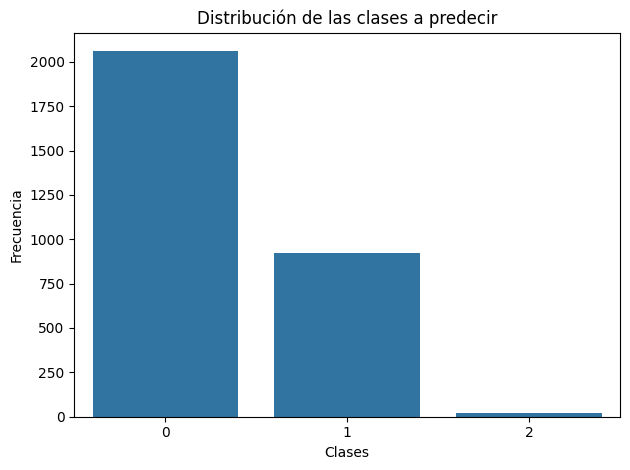

In [8]:
sns.countplot(data=df_train, x='class')
plt.title('Distribución de las clases a predecir')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Las clases están claramente desbalanceadas, esto será un factor a tener en cuenta a la hora de realizar la evaluación de los modelos.

## Valores faltantes

In [9]:
print('\nValores faltantes por columna:')
missing = X.isnull().sum()
print(missing[missing > 0])


Valores faltantes por columna:
Series([], dtype: int64)


No hay valores faltantes en ninguna variable, no será necesaria la imputación.

## Correlación

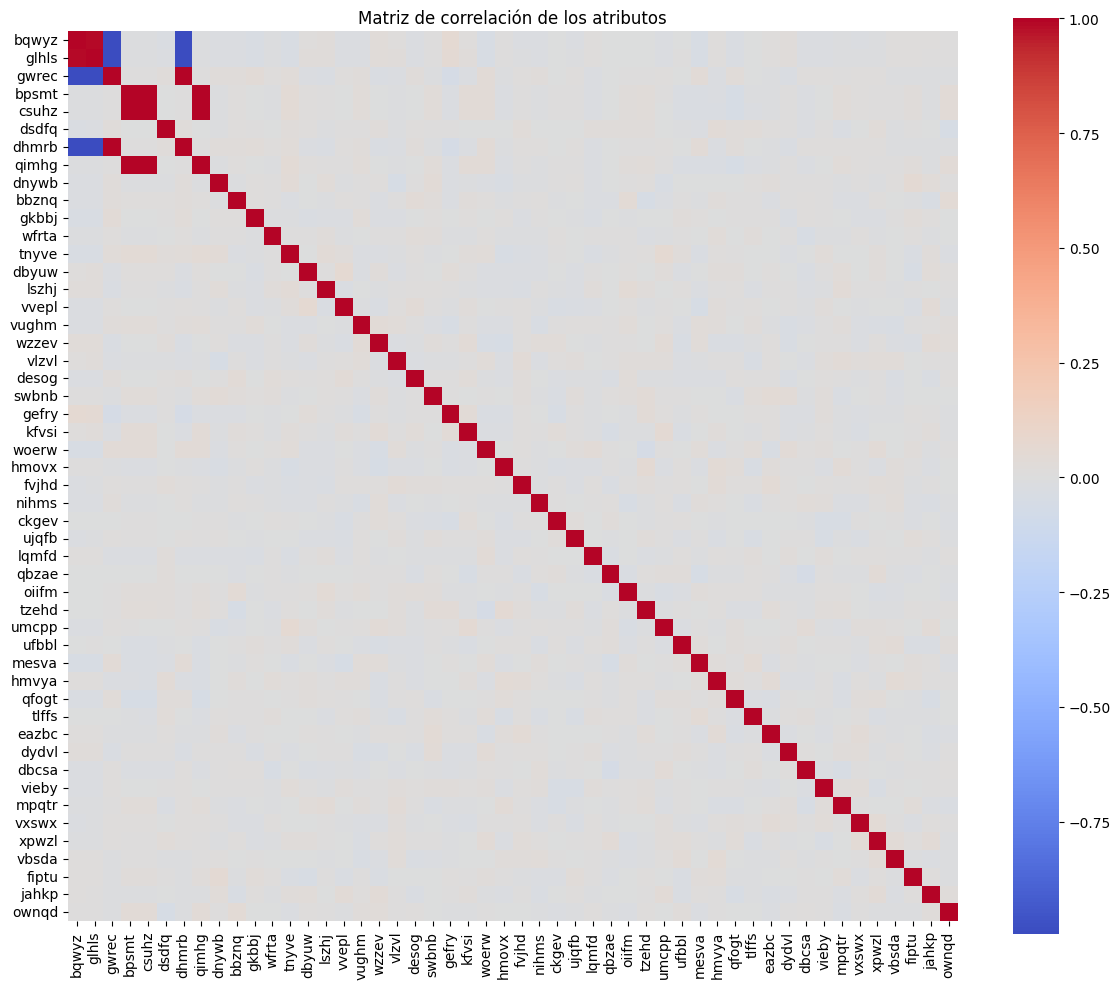

In [10]:
# Correlación entre atributos
plt.figure(figsize=(12, 10))
sns.heatmap(
    X.corr(),
    cmap='coolwarm',
    annot=False,
    square=True
)
plt.title('Matriz de correlación de los atributos')
plt.tight_layout()
plt.show()

# print(X.corr())

Las variables con correlación cercana a 1 son:
- ```glhls``` con ```bqwyz```
- ```dhmrb``` con ```gwrec```
- ```csuhz``` con ```bpsmt```
- ```qimhg``` con ```bpsmt```
- ```qimhg``` con ```csuhz```


Las variables con correlación cercana a -1 son:
- ```gwrec``` con ```bqwyz```
- ```gwrec``` con ```glhls```
- ```dhmrb``` con ```bqwyz```
- ```dhmrb``` con ```glhls```

Elegir una entre:
- ```qimhg```, ```csuhz``` y ```bpsmt```
- ```gwrec```, ```bqwyz```, ```glhls``` y ```dhmrb```


Analizamos la correlación con la variable ```class``` para decidir.

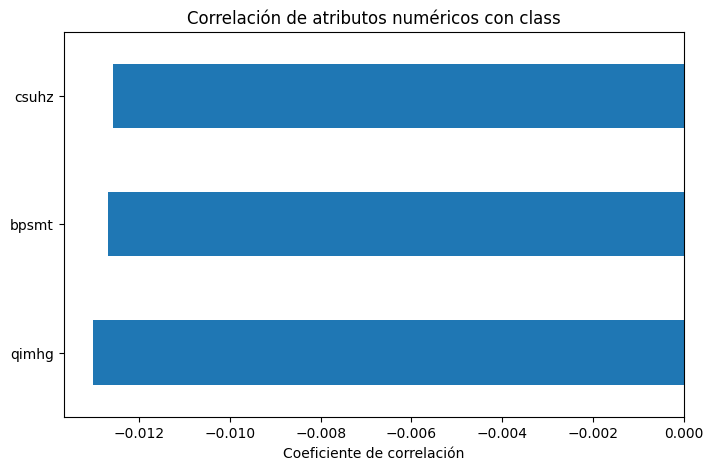

In [11]:
group_1 = ['qimhg', 'csuhz', 'bpsmt']

# Correlacion con la variable a predecir
corr_series = X[group_1].join(y).corr()['class'].sort_values().drop('class')

plt.figure(figsize=(8,5))
corr_series.plot(kind='barh')
plt.title('Correlación de atributos numéricos con class')
plt.xlabel('Coeficiente de correlación')
plt.show()

Seleccionamos ```qimhg``` y eliminamos el resto.

In [12]:
cols_to_drop = ['csuhz', 'bpsmt']

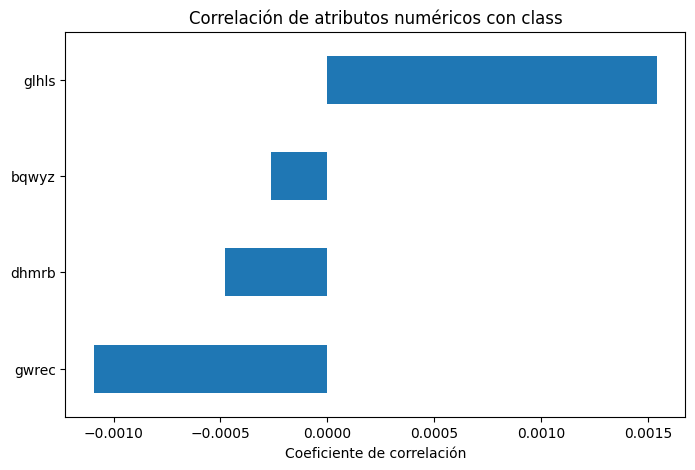

In [13]:
group_2 = ['gwrec', 'bqwyz', 'glhls', 'dhmrb']

# Correlacion con la variable a predecir
corr_series = X[group_2].join(y).corr()['class'].sort_values().drop('class')

plt.figure(figsize=(8,5))
corr_series.plot(kind='barh')
plt.title('Correlación de atributos numéricos con class')
plt.xlabel('Coeficiente de correlación')
plt.show()

Seleccionamos ```glhls``` y eliminamos el resto.

In [14]:
cols_to_drop = cols_to_drop + ['gwrec', 'bqwyz', 'dhmrb']

In [15]:
X = X.drop(cols_to_drop, axis=1)
X

,glhls,dsdfq,qimhg,dnywb,bbznq,gkbbj,wfrta,tnyve,dbyuw,lszhj,...,dydvl,dbcsa,vieby,mpqtr,vxswx,xpwzl,vbsda,fiptu,jahkp,ownqd
1,-3.689143,0.003135,16.248288,0.253989,-17.427260,2.888320,2.091874,1.924778,0.442244,0.363441,...,0.410522,0.616191,-1.037537,0.640160,-1.586657,1.786693,0.854592,-1.318690,-0.317202,1.387131
2,1.764485,0.012288,16.345302,1.098853,-4.312381,3.356589,0.837900,0.598783,1.313983,0.601125,...,0.515582,-1.436535,0.439239,0.298879,-0.401065,1.441416,-0.617473,-0.137313,1.982024,1.249828
3,-0.262428,0.022966,-12.881768,0.795419,3.261357,3.672278,2.246134,0.828556,4.713700,0.395698,...,0.796099,-1.371939,1.531874,-0.156040,-0.795904,0.114599,-0.416141,0.050341,0.200234,1.222475
4,-3.330536,0.030853,-11.115733,1.379458,-16.017284,6.576716,2.853156,1.157942,3.582034,3.544067,...,-0.666445,0.060147,0.547056,-1.044690,0.636920,0.376566,-1.013476,-0.710287,1.150738,0.391557
5,-1.091610,0.027421,2.135076,1.212872,-28.630766,-1.459318,3.325110,1.688835,0.508652,1.765701,...,0.312080,-1.371114,2.015222,1.064987,3.702119,1.460052,1.066106,-0.798662,1.337375,1.524883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.889372,0.032272,-9.774745,1.498397,13.483175,7.418412,0.637346,0.281673,1.169700,1.606395,...,2.453943,-0.775941,0.313495,-1.846885,0.259550,1.669447,-0.652184,0.449444,-0.837582,-0.232072
2997,2.739729,0.000482,37.781838,1.510205,11.835781,-6.720177,3.335016,1.289198,3.434183,1.525350,...,1.451224,-0.519178,0.775758,-3.448228,-0.499556,-0.468117,0.227029,1.540119,1.475654,1.801369
2998,-3.347024,0.011846,10.896598,1.326837,7.238309,-0.590139,0.345994,0.332284,3.854843,1.112456,...,0.262833,0.862477,2.485642,1.607552,0.161388,0.360561,-0.394782,3.482019,0.856448,0.814952
2999,-3.654657,0.003548,-6.461959,0.566876,-22.558274,0.136410,2.033419,0.029140,4.191675,2.766392,...,0.540062,-1.120118,0.124564,0.477820,-1.254005,0.238104,-1.749917,-1.516171,0.233822,-1.829026


# Preprocesamiento

No se ha visto la presencia de variables catgóricas

In [16]:
def make_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    num_cols = X.columns.tolist()

    numeric_pipe = Pipeline(steps=[
        ("scaler", StandardScaler())
    ])

    pre = ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, num_cols)
        ],
        remainder="drop"
    )
    return pre

preprocessor = make_preprocessor(X)

# Modelado

La optimización de hiperparámetros se hará con optuna

In [17]:
def suggest_classifier(trial: optuna.Trial, model_name: str):
    # Devuelve (clf, params) para el modelo elegido

    params = {}

    if model_name == 'Logistic Regression':
        C = trial.suggest_float('C', 1e-3, 1e3, log=True)
        solver = trial.suggest_categorical('solver', ['lbfgs', 'saga'])
        class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

        clf = LogisticRegression(
            C=C,
            solver=solver,
            l1_ratio=0, # penalty -> l2
            class_weight=class_weight,
            max_iter=5000,
            random_state=RANDOM_STATE,
        )
        params = {'C': C, 'solver': solver, 'class_weight': class_weight, 'l1_ratio': 0}


    elif model_name == 'Discriminant Analysis':
        solver = trial.suggest_categorical('solver', ['svd', 'lsqr', 'eigen'])

        if solver in ['lsqr', 'eigen']:
            shrinkage = trial.suggest_categorical('shrinkage', [None, 'auto'])
        else:
            shrinkage = None
        
        clf = LinearDiscriminantAnalysis(solver=solver, shrinkage=shrinkage)
        params = {'solver': solver, 'shrinkage': shrinkage}

    elif model_name == 'Gaussian Naive Bayes':
        var_smoothing = trial.suggest_float('var_smoothing', 1e-12, 1e-7, log=True)
        clf = GaussianNB(var_smoothing=var_smoothing)
        params = {'var_smoothing': var_smoothing}

    elif model_name == 'Classification tree':
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
        max_depth = trial.suggest_int('max_depth', 2, 40)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)

        clf = DecisionTreeClassifier(
            criterion=criterion,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=RANDOM_STATE,
        )
        params = {
            'criterion': criterion,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
        }

    elif model_name == 'Bagging':
        base_max_depth = trial.suggest_int('base_max_depth', 2, 20)
        base_min_samples_leaf = trial.suggest_int('base_min_samples_leaf', 1, 20)

        base_est = DecisionTreeClassifier(
            max_depth=base_max_depth,
            min_samples_leaf=base_min_samples_leaf,
            random_state=RANDOM_STATE,
        )

        n_estimators = trial.suggest_int('n_estimators', 20, 400)
        max_samples = trial.suggest_float('max_samples', 0.4, 1.0)
        max_features = trial.suggest_float('max_features', 0.4, 1.0)
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])

        clf = BaggingClassifier(
            estimator=base_est,
            n_estimators=n_estimators,
            max_samples=max_samples,
            max_features=max_features,
            bootstrap=bootstrap,
            n_jobs=N_JOBS,
            random_state=RANDOM_STATE,
        )
        params = {
            'base_max_depth': base_max_depth,
            'base_min_samples_leaf': base_min_samples_leaf,
            'n_estimators': n_estimators,
            'max_samples': max_samples,
            'max_features': max_features,
            'bootstrap': bootstrap,
        }

    elif model_name == 'Random Forest':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 3, 40)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            class_weight=class_weight,
            n_jobs=N_JOBS,
            random_state=RANDOM_STATE,
        )
        params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features,
            'class_weight': class_weight,
        }

    elif model_name == 'AdaBoost':
        n_estimators = trial.suggest_int('n_estimators', 50, 800)
        learning_rate = trial.suggest_float('learning_rate', 1e-3, 2.0, log=True)

        clf = AdaBoostClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=RANDOM_STATE,
        )
        params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

    elif model_name == 'Gradient Boosting':
        n_estimators = trial.suggest_int('n_estimators', 50, 800)
        learning_rate = trial.suggest_float('learning_rate', 1e-3, 1.0, log=True)
        max_depth = trial.suggest_int('max_depth', 2, 6)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)

        clf = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            subsample=subsample,
            random_state=RANDOM_STATE,
        )
        params = {
            'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'max_depth': max_depth,
            'subsample': subsample,
        }

    elif model_name == 'Support Vector Machine':
        C = trial.suggest_float('C', 1e-2, 1e3, log=True)
        gamma = trial.suggest_float('gamma', 1e-4, 1e-1, log=True)
        class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

        clf = SVC(
            kernel='rbf',
            C=C,
            gamma=gamma,
            class_weight=class_weight,
            probability=False,
            random_state=RANDOM_STATE,
        )
        params = {'kernel': 'rbf', 'C': C, 'gamma': gamma, 'class_weight': class_weight}

    else:
        raise ValueError(f'Modelo no soportado: {model_name}')

    return clf, params


MODELS = [
    'Logistic Regression',
    'Discriminant Analysis',
    'Gaussian Naive Bayes',
    'Classification tree',
    'Bagging',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Support Vector Machine',
]

# Optimización de modelos

In [18]:
def make_objective(model_name: str, X, y, preprocessor: ColumnTransformer):
    def objective(trial: optuna.Trial):
        clf, _ = suggest_classifier(trial, model_name)

        pipe = Pipeline(steps=[
            ('pre', preprocessor),
            ('clf', clf)
        ])

        scores = cross_val_score(
            pipe,
            X, y,
            cv=cv5,
            scoring='accuracy',
            n_jobs=N_JOBS
        )
        return float(scores.mean())

    return objective

In [19]:
def train_accuracy(pipe: Pipeline, X, y):
    pipe.fit(X, y)
    pred = pipe.predict(X)
    return accuracy_score(y, pred)

def optimize_all_models(X, y, preprocessor: ColumnTransformer, n_trials=50, sampler_seed=RANDOM_STATE):
    records = []

    sampler = optuna.samplers.TPESampler(seed=sampler_seed)

    for model_name in MODELS:
        study = optuna.create_study(direction='maximize', sampler=sampler)
        study.optimize(make_objective(model_name, X, y, preprocessor), n_trials=n_trials, show_progress_bar=False)

        # Reconstruir mejor estimador
        best_trial = study.best_trial
        best_clf, best_params_legible = suggest_classifier(best_trial, model_name)

        best_pipe = Pipeline(steps=[('pre', preprocessor), ('clf', best_clf)])

        # métricas pedidas
        tr_acc = train_accuracy(best_pipe, X, y)
        cv_scores = cross_val_score(best_pipe, X, y, cv=cv5, scoring='accuracy', n_jobs=N_JOBS)

        records.append({
            'Classifier': model_name,
            'Best parameters': best_params_legible,   # legible para el informe
            'Train accuracy': float(tr_acc),
            '5-fold CV accuracy (mean)': float(cv_scores.mean()),
            '5-fold CV accuracy (std)': float(cv_scores.std()),
            'Best estimator': best_pipe,  # útil para predecir test
            'Optuna best value': float(study.best_value),
        })

        print(f'{model_name:>22} | CV={cv_scores.mean():.4f} ± {cv_scores.std():.4f} | Train={tr_acc:.4f}')

    summary = (
        pd.DataFrame([{k: v for k, v in r.items() if k not in ['Best estimator', 'Optuna best value']} for r in records])
        .sort_values('5-fold CV accuracy (mean)', ascending=False)
        .reset_index(drop=True)
    )

    return records, summary

# Ejecución
records, summary = optimize_all_models(X, y, preprocessor, n_trials=50)
print(summary)
for r in records:
    print(f'Mejores parámetros de {r['Classifier']} = {r['Best parameters']}')


[I 2026-01-18 11:07:31,234] A new study created in memory with name: no-name-91a0d8c6-dc1b-4b99-ba2f-580862eedd82
[I 2026-01-18 11:07:33,897] Trial 0 finished with value: 0.7116666666666667 and parameters: {'C': 0.1767016940294795, 'solver': 'lbfgs', 'class_weight': None}. Best is trial 0 with value: 0.7116666666666667.
/home/mayumar/Escritorio/metodos_superivsados/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mayumar/Escritorio/metodos_superivsados/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mayumar/Escritorio/metodos_superivsados/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mayumar/Escritorio/metod

   Logistic Regression | CV=0.7117 ± 0.0184 | Train=0.7237


[I 2026-01-18 11:08:42,083] Trial 1 finished with value: 0.7073333333333334 and parameters: {'solver': 'eigen', 'shrinkage': 'auto'}. Best is trial 0 with value: 0.7120000000000001.
[I 2026-01-18 11:08:42,271] Trial 2 finished with value: 0.7073333333333334 and parameters: {'solver': 'eigen', 'shrinkage': 'auto'}. Best is trial 0 with value: 0.7120000000000001.
[I 2026-01-18 11:08:42,459] Trial 3 finished with value: 0.7073333333333334 and parameters: {'solver': 'eigen', 'shrinkage': 'auto'}. Best is trial 0 with value: 0.7120000000000001.
[I 2026-01-18 11:08:42,618] Trial 4 finished with value: 0.712 and parameters: {'solver': 'lsqr', 'shrinkage': None}. Best is trial 0 with value: 0.7120000000000001.
[I 2026-01-18 11:08:42,796] Trial 5 finished with value: 0.7120000000000001 and parameters: {'solver': 'svd'}. Best is trial 0 with value: 0.7120000000000001.
[I 2026-01-18 11:08:42,965] Trial 6 finished with value: 0.7120000000000001 and parameters: {'solver': 'svd'}. Best is trial 0 wi

 Discriminant Analysis | CV=0.7120 ± 0.0191 | Train=0.7237


[I 2026-01-18 11:08:50,583] Trial 1 finished with value: 0.752 and parameters: {'var_smoothing': 2.9442723591496756e-10}. Best is trial 0 with value: 0.752.
[I 2026-01-18 11:08:50,740] Trial 2 finished with value: 0.752 and parameters: {'var_smoothing': 4.1083188946999313e-10}. Best is trial 0 with value: 0.752.
[I 2026-01-18 11:08:50,897] Trial 3 finished with value: 0.752 and parameters: {'var_smoothing': 1.373109246824032e-10}. Best is trial 0 with value: 0.752.
[I 2026-01-18 11:08:51,047] Trial 4 finished with value: 0.752 and parameters: {'var_smoothing': 1.3399717231179718e-12}. Best is trial 0 with value: 0.752.
[I 2026-01-18 11:08:51,204] Trial 5 finished with value: 0.752 and parameters: {'var_smoothing': 3.4630370261191896e-12}. Best is trial 0 with value: 0.752.
[I 2026-01-18 11:08:51,362] Trial 6 finished with value: 0.752 and parameters: {'var_smoothing': 1.4359718569878106e-12}. Best is trial 0 with value: 0.752.
[I 2026-01-18 11:08:51,509] Trial 7 finished with value: 0.

  Gaussian Naive Bayes | CV=0.7520 ± 0.0128 | Train=0.7713


[I 2026-01-18 11:08:58,490] Trial 0 finished with value: 0.6613333333333333 and parameters: {'criterion': 'gini', 'max_depth': 31, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6613333333333333.
[I 2026-01-18 11:08:58,850] Trial 1 finished with value: 0.6733333333333332 and parameters: {'criterion': 'log_loss', 'max_depth': 33, 'min_samples_split': 33, 'min_samples_leaf': 27}. Best is trial 1 with value: 0.6733333333333332.
[I 2026-01-18 11:08:59,200] Trial 2 finished with value: 0.6733333333333332 and parameters: {'criterion': 'log_loss', 'max_depth': 23, 'min_samples_split': 41, 'min_samples_leaf': 27}. Best is trial 1 with value: 0.6733333333333332.
[I 2026-01-18 11:08:59,489] Trial 3 finished with value: 0.6803333333333332 and parameters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 42, 'min_samples_leaf': 26}. Best is trial 3 with value: 0.6803333333333332.
[I 2026-01-18 11:08:59,801] Trial 4 finished with value: 0.6813333333333333 a

   Classification tree | CV=0.7040 ± 0.0142 | Train=0.7520


[I 2026-01-18 11:09:12,937] Trial 0 finished with value: 0.6903333333333335 and parameters: {'base_max_depth': 3, 'base_min_samples_leaf': 17, 'n_estimators': 142, 'max_samples': 0.5119111062399125, 'max_features': 0.4244650849328584, 'bootstrap': False}. Best is trial 0 with value: 0.6903333333333335.
[I 2026-01-18 11:09:13,766] Trial 1 finished with value: 0.6900000000000001 and parameters: {'base_max_depth': 2, 'base_min_samples_leaf': 11, 'n_estimators': 106, 'max_samples': 0.7871036742456698, 'max_features': 0.5046198574029949, 'bootstrap': True}. Best is trial 0 with value: 0.6903333333333335.
[I 2026-01-18 11:09:18,138] Trial 2 finished with value: 0.7336666666666667 and parameters: {'base_max_depth': 19, 'base_min_samples_leaf': 3, 'n_estimators': 149, 'max_samples': 0.46808411274435346, 'max_features': 0.9548161709671377, 'bootstrap': True}. Best is trial 2 with value: 0.7336666666666667.
[I 2026-01-18 11:09:24,025] Trial 3 finished with value: 0.716 and parameters: {'base_max

               Bagging | CV=0.7413 ± 0.0115 | Train=0.9507


[I 2026-01-18 11:15:17,412] Trial 0 finished with value: 0.7386666666666667 and parameters: {'n_estimators': 275, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': None}. Best is trial 0 with value: 0.7386666666666667.
[I 2026-01-18 11:15:19,432] Trial 1 finished with value: 0.7096666666666668 and parameters: {'n_estimators': 433, 'max_depth': 3, 'min_samples_split': 47, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7386666666666667.
[I 2026-01-18 11:15:25,380] Trial 2 finished with value: 0.7386666666666667 and parameters: {'n_estimators': 866, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 17, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7386666666666667.
[I 2026-01-18 11:15:31,600] Trial 3 finished with value: 0.7053333333333333 and parameters: {'n_estimators': 992, 'max_depth': 8, 'min_samples_split': 27, 'min_samples

         Random Forest | CV=0.7437 ± 0.0255 | Train=0.9697


[I 2026-01-18 11:21:24,868] Trial 0 finished with value: 0.719 and parameters: {'n_estimators': 767, 'learning_rate': 0.27278460442959496}. Best is trial 0 with value: 0.719.
[I 2026-01-18 11:21:31,716] Trial 1 finished with value: 0.7136666666666666 and parameters: {'n_estimators': 466, 'learning_rate': 0.10454626749895013}. Best is trial 0 with value: 0.719.
[I 2026-01-18 11:21:37,113] Trial 2 finished with value: 0.6986666666666667 and parameters: {'n_estimators': 365, 'learning_rate': 0.006573057435931465}. Best is trial 0 with value: 0.719.
[I 2026-01-18 11:21:41,863] Trial 3 finished with value: 0.7186666666666667 and parameters: {'n_estimators': 317, 'learning_rate': 0.31744810780255533}. Best is trial 0 with value: 0.719.
[I 2026-01-18 11:21:42,870] Trial 4 finished with value: 0.6846666666666665 and parameters: {'n_estimators': 60, 'learning_rate': 0.0024163468142490885}. Best is trial 0 with value: 0.719.
[I 2026-01-18 11:21:44,251] Trial 5 finished with value: 0.681333333333

              AdaBoost | CV=0.7277 ± 0.0136 | Train=0.7430


[I 2026-01-18 11:29:29,222] Trial 0 finished with value: 0.7449999999999999 and parameters: {'n_estimators': 349, 'learning_rate': 0.07039637468468571, 'max_depth': 5, 'subsample': 0.5226520048860223}. Best is trial 0 with value: 0.7449999999999999.
[I 2026-01-18 11:30:09,733] Trial 1 finished with value: 0.7396666666666667 and parameters: {'n_estimators': 331, 'learning_rate': 0.07543619025196019, 'max_depth': 4, 'subsample': 0.9282449205941612}. Best is trial 0 with value: 0.7449999999999999.
[I 2026-01-18 11:30:40,032] Trial 2 finished with value: 0.7106666666666667 and parameters: {'n_estimators': 544, 'learning_rate': 0.0030817917005205625, 'max_depth': 2, 'subsample': 0.8212096391031578}. Best is trial 0 with value: 0.7449999999999999.
[I 2026-01-18 11:30:50,588] Trial 3 finished with value: 0.7366666666666666 and parameters: {'n_estimators': 69, 'learning_rate': 0.05719087535188473, 'max_depth': 6, 'subsample': 0.7877370889379395}. Best is trial 0 with value: 0.7449999999999999.

     Gradient Boosting | CV=0.7540 ± 0.0242 | Train=0.8897


[I 2026-01-18 12:02:53,556] Trial 0 finished with value: 0.7233333333333334 and parameters: {'C': 47.35384181058586, 'gamma': 0.025730178030080878, 'class_weight': None}. Best is trial 0 with value: 0.7233333333333334.
[I 2026-01-18 12:02:54,208] Trial 1 finished with value: 0.7246666666666666 and parameters: {'C': 56.63354641950932, 'gamma': 0.02633323517987836, 'class_weight': None}. Best is trial 1 with value: 0.7246666666666666.
[I 2026-01-18 12:02:54,770] Trial 2 finished with value: 0.7006666666666667 and parameters: {'C': 0.7245868181143026, 'gamma': 0.021342185100977337, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7246666666666666.
[I 2026-01-18 12:02:55,645] Trial 3 finished with value: 0.7016666666666667 and parameters: {'C': 195.9132274597864, 'gamma': 0.001936342073797641, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7246666666666666.
[I 2026-01-18 12:02:56,409] Trial 4 finished with value: 0.611 and parameters: {'C': 0.03278078460674784, 'gamma

Support Vector Machine | CV=0.7373 ± 0.0174 | Train=0.8213
               Classifier                                    Best parameters  \
0       Gradient Boosting  {'n_estimators': 625, 'learning_rate': 0.04634...   
1    Gaussian Naive Bayes            {'var_smoothing': 7.15872863150019e-09}   
2           Random Forest  {'n_estimators': 586, 'max_depth': 19, 'min_sa...   
3                 Bagging  {'base_max_depth': 19, 'base_min_samples_leaf'...   
4  Support Vector Machine  {'kernel': 'rbf', 'C': 54.15519379815613, 'gam...   
5                AdaBoost  {'n_estimators': 729, 'learning_rate': 0.15348...   
6   Discriminant Analysis               {'solver': 'svd', 'shrinkage': None}   
7     Logistic Regression  {'C': 0.1767016940294795, 'solver': 'lbfgs', '...   
8     Classification tree  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   

   Train accuracy  5-fold CV accuracy (mean)  5-fold CV accuracy (std)  
0        0.889667                   0.754000                  0.024

# Predecir test

In [20]:
best = max(records, key=lambda r: r["5-fold CV accuracy (mean)"])
best_name = best["Classifier"]
best_model = best["Best estimator"]

print("Mejor modelo:", best_name)
print("Params:", best["Best parameters"])

best_model.fit(X, y)
test_pred = best_model.predict(df_test)

submission = df_test.copy()
submission["class"] = test_pred.astype(int)
submission.to_csv(f"test_with_predictions_{best_name}.csv", index=False)

Mejor modelo: Gradient Boosting
Params: {'n_estimators': 625, 'learning_rate': 0.04634818709030522, 'max_depth': 2, 'subsample': 0.7942571285430543}
